<a href="https://colab.research.google.com/github/shiktr1785/isss-ai-python/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Metaheuristics for Traveling Salesman Problem
### Shikhar Mani Tripathi

The main objective of this assignment is to implement a metaheuristic algorithm in Python to solve the Traveling Salesman Problem (TSP). The TSP is an optimization problem that seeks to determine the most efficient route to visit each node exactly once and return to the starting point. This problem is recognized as a complex combinatorial challenge, as multiple solutions exist. Optimization involves analyzing all possible solutions that meet the constraints of the problem to identify the most optimal solution with the lowest resource cost.

>Metaheuristics are powerful tools for solving complex optimization problems, especially when traditional methods are infeasible or inefficient. Although they do not guarantee optimal solutions, they can often deliver high-quality solutions in a reasonable timeframe, making them invaluable in the industry. A key consideration in these algorithms is the trade-off between solution quality, computational cost, and parameter tuning.

For the Traveling Salesman Problem (TSP) optimization, there are four available options to choose from. In this case, I will be using a Genetic Algorithm to tackle the optimization challenge.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def generate_cities(n_cities, range_min=0, range_max=100):

  # Generate random city coordinates within a given range.
  return np.random.uniform(range_min, range_max, size=(n_cities, 2))

In [4]:
def compute_distance_matrix(cities):

  # Compute the euclidian distance between the cities.

  n = len(cities)
  distance_matrix = np.zeros((n, n))

  for i in range(n):
    for j in range(n):
      distance_matrix[i,j] = np.linalg.norm(cities[i] - cities[j])
  return distance_matrix

In [5]:
def evaluate_tour_cost(tour, distance_matrix):

  # Calculate the total cost for the distance of the tour.
  cost = 0

  for i in range(len(tour)):
    cost += distance_matrix[tour[i], tour[(i+1) % len(tour)]]
  return cost

## Genetic Algorithm

In [10]:
# @title Generating Initial Population

def generate_initial_population(pop_size, num_cities):

  population = []

  for _ in range(pop_size):
    tour = np.random.permutation(n_cities)
    population.append(tour)
  return population

In [14]:
# @title Fitness Evaluation

def evaluate_fitness(population, distance_matrix):

  fitness = []

  for tour in population:
    cost = evaluate_tour_cost(tour, distance_matrix)
    fitness.append(cost)
  return fitness

## Plot and Visualisation

In [6]:
def plot_cities_and_tour(cities, tour):

  # Visualise cities and optional tour path

  plt.figure(figsize=(10,6))
  plt.scatter(cities[:, 0], cities[:, 1], color='blue', label='Cities')

  # Add labels to cities
  for i, (x, y) in enumerate(cities):
      plt.text(x, y, str(i), fontsize=12, color='red', ha='right', va='bottom')

  # If a tour is provided, plot the path
  if tour is not None:
    for i in range(len(tour) - 1):
      plt.plot([cities[tour[i], 0], cities[tour[i+1], 0]],
              [cities[tour[i], 1], cities[tour[i+1], 1]],
              color='red', linestyle='-', linewidth=2)

      # Add return to starting city

      plt.plot([cities[tour[-1]][0], cities[tour[0]][0]],
              [cities[tour[-1]][1], cities[tour[0]][1]],
              color='orange', linestyle='-', linewidth=2)

  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("TSP Cities and Optional Tour")
  plt.grid()
  plt.show()

## Driver Function

Cities:
 [[64.77298199  7.45244526]
 [78.96281738 34.14279574]
 [54.5772019  44.3769073 ]
 [27.00810654 55.34380056]
 [85.17413088 18.75793301]
 [84.95745408  1.11622387]
 [30.81005374 39.49591824]
 [63.66991408 43.21016814]
 [28.41395462 82.92304254]
 [ 3.1728983  40.10070631]]

Distance Matrix:
 [[ 0.         30.22790494 38.30626357 60.98989859 23.32425624 21.15562845
  46.69330418 35.77473276 83.77225032 69.71713749]
 [30.22790494  0.         26.44608254 56.11394287 16.59139586 33.56620501
  48.44940212 17.77892385 70.24741991 76.02373663]
 [38.30626357 26.44608254  0.         29.67031795 39.90618882 52.8625241
  24.26316933  9.16726213 46.58669391 51.58186041]
 [60.98989859 56.11394287 29.67031795  0.         68.71544289 79.3647085
  16.29755125 38.61752411 27.61505019 28.29256216]
 [23.32425624 16.59139586 39.90618882 68.71544289  0.         17.64303972
  58.18519497 32.56291054 85.66725681 84.73320551]
 [21.15562845 33.56620501 52.8625241  79.3647085  17.64303972  0.
  66.3697363

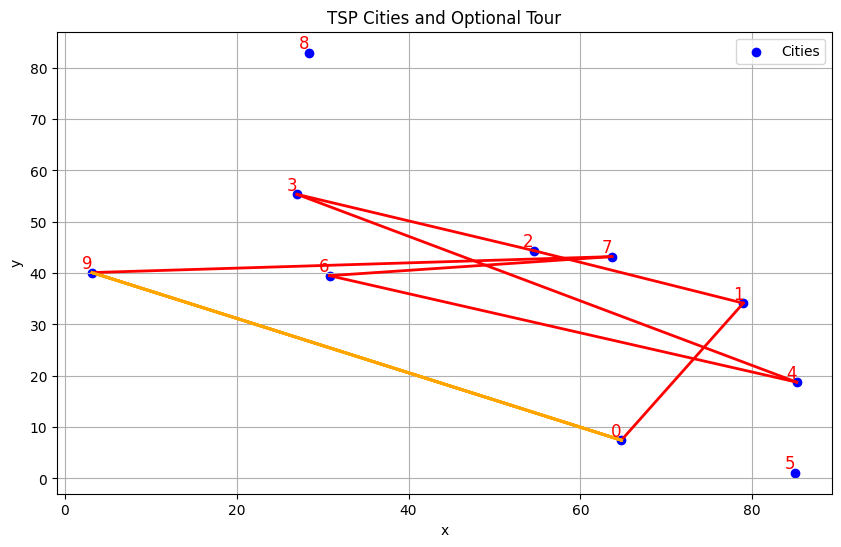

In [15]:
if __name__ == "__main__":

  # Generate Cities
  cities = generate_cities(10)
  print("Cities:\n", cities)

  # Compute distance matrix
  distance_matrix = compute_distance_matrix(cities)
  print("\nDistance Matrix:\n", distance_matrix)

  tour = [0, 1, 2, 3, 4, 6, 7, 9]
  cost = evaluate_tour_cost(tour, distance_matrix)
  print("\nTour Cost:", cost)

  plot_cities_and_tour(cities, tour)